<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Tensorflow_Advanced_Deep_Learning_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#number of unique train labels
unique, counts= np.unique(y_train, return_counts = True)
print(f"Unique Train Labels", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Unique Train Labels {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [5]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [6]:
#Let us get a random sample of the image
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
#Let us have a sample of 35 mnist digits from the set
indices = np.random.randint(0, X_train.shape[0], size = 25)
print(indices)

[45519 41215  9668 58840 39072 27368  7590 23413  8836 11187 23793 33089
 16666 50612 33278 28533 13581 35695 47421 11652 12958 29676 26840 20934
 49382]


In [8]:
#Let us fetch the images
images = X_train[indices]
labels = y_train[indices]
print(f"images: {images}")
print(f"labesl: {labels}")

images: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
labesl: [5 5 2 4 1 9 3 1 1 0 0 8 6 6 8 2 1 9 8 4 8 0 0 0 4]


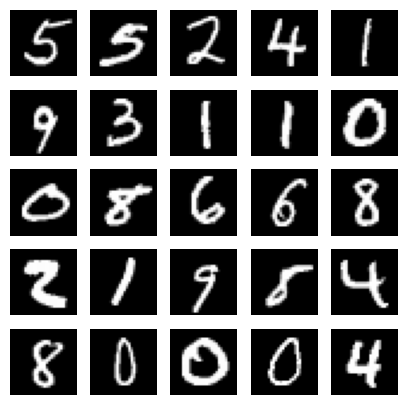

In [9]:
#Visualize, visualize, visualize
"""Let us plot the first 25 random digits"""
plt.figure(figsize = (5, 5))
for i in range(len(indices)):
  plt.subplot(5, 5, i+1)
  image = (images[i])
  plt.imshow(image, cmap = "gray")
  plt.axis("off")
plt.savefig("Mnist Image Samples")
plt.show()
plt.close("all")

#Multi Layer Perception
The MNIST digit classifier model

In [10]:
import numpy as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [11]:

#Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Let us see the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)
print(y_train.shape)
print(X_train.shape)

10
(60000,)
(60000, 28, 28)


In [12]:
#We convert to one_hot vector
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)
#Let us work on image dimensions (assumed square)
image_size = X_train.shape[1]
"""print(image_size)"""
input_size = image_size * image_size #Essentially, the image input size is made (28, 28, )
#Then we do the reshaping and normalization-same as feature engineering
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype("float32")/255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype("float32")/255

#Now let us network our parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

#This means that our  model is a 3 layer multilayerpercepron model with ReLu and dropout after each layer.


In [13]:
model = Sequential()
#Layer 1
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation("relu"))
model.add(Dropout(dropout))
#Layer 2
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation("relu"))
model.add(Dropout(dropout))
#Layer 3
model.add(Dense(num_labels))
model.add(Activation("softmax"))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes = True)
#Now let us consider the loss function for one hot encoder
#Note that we will use adam activation
#For metrics, we will use accuracy. We can also consider prcision an recall or confussion matrix
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Let us not train our neural networl"
model.fit(X_train, y_train, epochs = 20, batch_size = batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [14]:
#That was awesome. Let us now do some validation
_, acc = model.evaluate(X_test, y_test, batch_size = batch_size)
print("\nTest Accuracy:%.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9812

Test Accuracy:98.1%


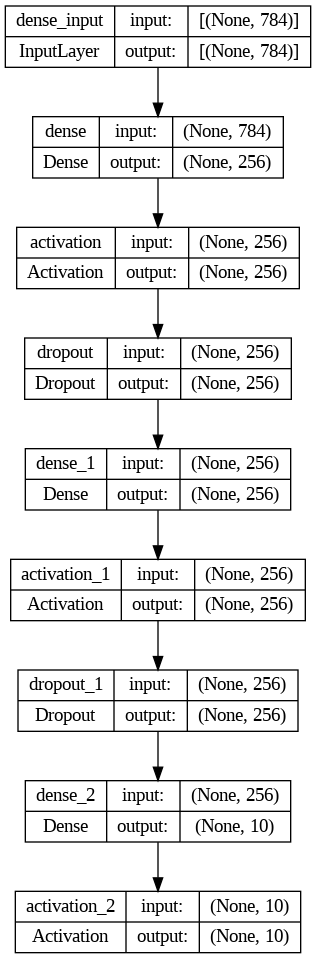

In [15]:
plot_model(model, to_file = "mlp-mnist.png", show_shapes = True)

In [17]:
#Let us Leave this cell here. We will use it for classification











